# REGRESSION

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [4]:
df=pd.read_csv("final_scout_20201204.csv")

In [5]:
df.head()

,price,km,hp,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Displacement,Gears,Age,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Upholstery_Color_Black,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Other
0,15770,56013.0,66.0,2.0,1,5.0,5.0,1422.0,5.0,3.0,...,0,1,0,0,1,0,1,0,0,0
1,14500,80000.0,141.0,1.0,0,3.0,4.0,1798.0,7.0,2.0,...,1,0,0,0,1,0,0,0,1,0
2,14640,83450.0,85.0,1.0,0,4.0,4.0,1598.0,5.0,3.0,...,0,1,0,0,1,0,1,0,0,0
3,14500,73000.0,66.0,1.0,0,3.0,4.0,1422.0,6.0,3.0,...,0,1,0,0,1,0,1,0,0,0
4,16790,16200.0,66.0,1.0,1,5.0,5.0,1422.0,5.0,3.0,...,0,1,0,0,1,0,1,0,0,0


In [6]:
df.shape

(15915, 145)

In [7]:
list(df.columns)

['price',
 'km',
 'hp',
 'Previous_Owners',
 'Inspection_New',
 'Nr_of_Doors',
 'Nr_of_Seats',
 'Displacement',
 'Gears',
 'Age',
 'Combumption_Comb',
 'cc_Air conditioning',
 'cc_Air suspension',
 'cc_Armrest',
 'cc_Automatic climate control',
 'cc_Auxiliary heating',
 'cc_Cruise control',
 'cc_Electric Starter',
 'cc_Electric tailgate',
 'cc_Electrical side mirrors',
 'cc_Electrically adjustable seats',
 'cc_Electrically heated windshield',
 'cc_Heads-up display',
 'cc_Heated steering wheel',
 'cc_Hill Holder',
 'cc_Keyless central door lock',
 'cc_Leather seats',
 'cc_Leather steering wheel',
 'cc_Light sensor',
 'cc_Lumbar support',
 'cc_Massage seats',
 'cc_Multi-function steering wheel',
 'cc_Navigation system',
 'cc_Panorama roof',
 'cc_Park Distance Control',
 'cc_Parking assist system camera',
 'cc_Parking assist system self-steering',
 'cc_Parking assist system sensors front',
 'cc_Parking assist system sensors rear',
 'cc_Power windows',
 'cc_Rain sensor',
 'cc_Seat heating'

In [8]:
df.corr()

,price,km,hp,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Displacement,Gears,Age,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Upholstery_Color_Black,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Other
price,1.000000,-0.399172,0.696769,-0.144119,0.008180,0.158964,0.247357,0.287929,0.503376,-0.471964,...,-0.018197,0.019079,0.026738,-0.014329,-0.386556,0.386556,-0.078691,0.290459,-0.104672,0.077080
km,-0.399172,1.000000,0.004020,0.156912,-0.049442,0.005794,-0.008603,0.301893,0.019192,0.756775,...,-0.433884,0.429047,-0.003162,0.041313,-0.034413,0.034413,-0.092097,0.003023,0.163643,-0.048997
hp,0.696769,0.004020,1.000000,-0.022171,0.036764,0.120870,0.288772,0.602953,0.493992,-0.083267,...,-0.108057,0.111678,0.012437,-0.031408,-0.469235,0.469235,-0.052675,0.247764,-0.086119,0.041485
Previous_Owners,-0.144119,0.156912,-0.022171,1.000000,0.019868,-0.133714,0.000165,0.028414,-0.050832,0.316297,...,-0.028501,0.031474,-0.002230,-0.022634,-0.009208,0.009208,0.014885,0.024302,0.022107,-0.058359
Inspection_New,0.008180,-0.049442,0.036764,0.019868,1.000000,-0.116865,-0.003130,-0.023764,-0.052563,-0.045085,...,0.132678,-0.127785,-0.010155,-0.036399,0.033319,-0.033319,0.076843,-0.030775,-0.104796,0.020692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upholstery_Type_Part/Full Leather,0.386556,0.034413,0.469235,0.009208,-0.033319,0.071699,0.201437,0.343346,0.251896,0.012919,...,-0.184716,0.185728,0.015501,-0.011308,-1.000000,1.000000,-0.021242,0.227863,-0.050863,-0.032125
Upholstery_Color_Black,-0.078691,-0.092097,-0.052675,0.014885,0.076843,-0.102407,-0.085276,-0.065267,-0.066546,-0.032677,...,0.106700,-0.105494,0.002229,-0.010694,0.021242,-0.021242,1.000000,-0.276706,-0.652438,-0.577105
Upholstery_Color_Brown,0.290459,0.003023,0.247764,0.024302,-0.030775,0.055754,0.237971,0.150400,0.088106,0.004094,...,-0.074380,0.073439,-0.002868,0.008610,-0.227863,0.227863,-0.276706,1.000000,-0.061725,-0.054598
Upholstery_Color_Grey,-0.104672,0.163643,-0.086119,0.022107,-0.104796,0.024957,-0.009683,-0.017096,-0.038380,0.115682,...,-0.064335,0.062398,0.003883,0.014515,0.050863,-0.050863,-0.652438,-0.061725,1.000000,-0.128736


In [9]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [10]:
# price ile en fazla correlasyonu olan featurelari getirir
df.corr()["price"].sort_values()

Age                         -0.471964
Gearing_Type_Manual         -0.431675
km                          -0.399172
Upholstery_Type_Cloth       -0.386556
make_model_Opel Corsa       -0.379373
                               ...   
make_model_Renault Espace    0.420872
ss_LED Headlights            0.436199
Gears                        0.503376
hp                           0.696769
price                        1.000000
Name: price, Length: 145, dtype: float64

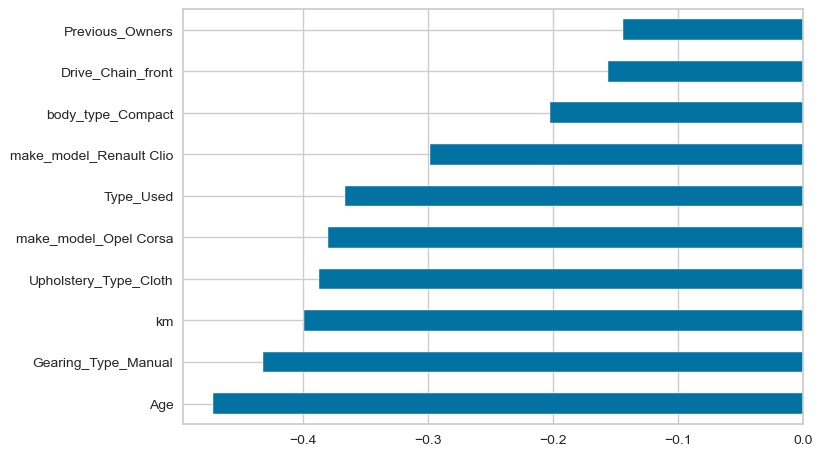

In [11]:
df.corr()["price"].sort_values().head(10).plot.barh();

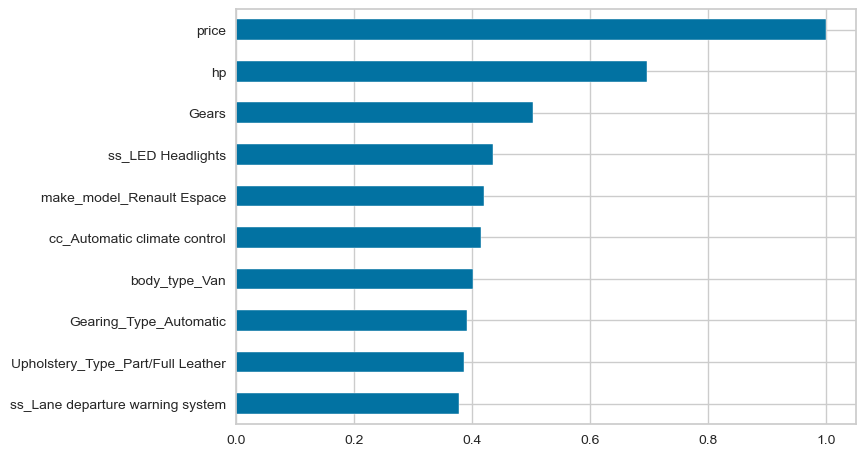

In [12]:
df.corr()["price"].sort_values().tail(10).plot.barh();

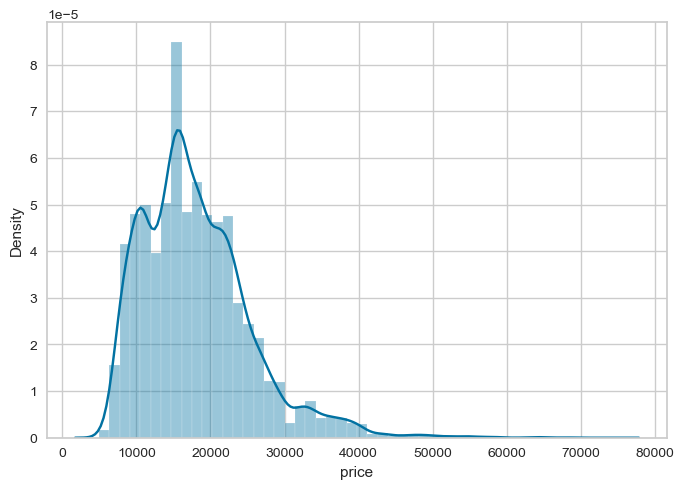

In [13]:
sns.distplot(df.price);

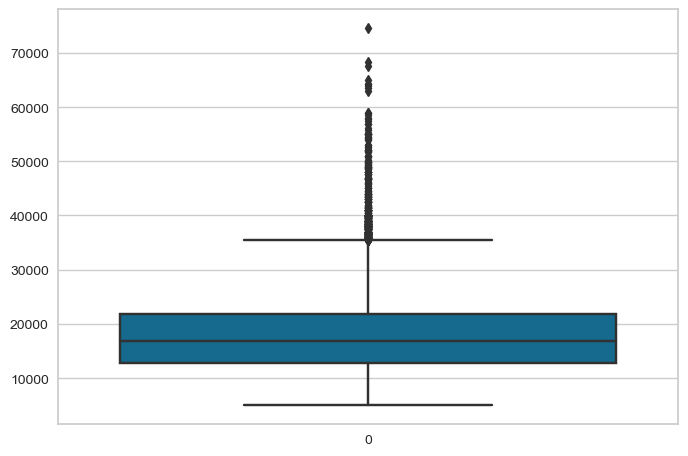

In [14]:
sns.boxplot(data=df.price, orient="v");

In [15]:
X=df.drop(["price"], axis=1)
y=df["price"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X.shape

(15915, 144)

In [18]:
X_train.shape

(12732, 144)

In [19]:
'''
Feature sayisi sistikce, arttikca sentetik sekilde R2_score artmaya meyillidir. 
R2_score, icinde fazla feature i cezalandiran yontem yoktur. 
‘overfitting’ durumunda yüksek R-kare değerlerine ulaşabilirsiniz.
R2_score fikir verir ama burada en onemli metrik RMSE dir.

R2_score, dusukse model basarisizdir, yuksekse baska metriklere bakip model degerlendirmesi yapilir.

'''


def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(f'R2_Score:{score}', # y deki degisimin X lerle ne kadar anlatilabildini ifade eder. bagimli degiskeni olcme gucudur.
                 f'MAE:{mae}', # y tahminlerinde yapilan ortalama hata degeri.
                 f'MSE:{mse}', # RMSE nin karesidir.
                 f'RMSE:{rmse}', sep='\n') # y tahminlerinde yapilan ortalama hata degerini verirken outlier lari daha fazla cezalandiran bir deger verir.



## 1-Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [22]:
eval_metrics(y_test, y_pred)

R2_Score:0.8929347374767251
MAE:1718.9533253019374
MSE:5778053.174368894
RMSE:2403.758135580386


In [23]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.8896701058248307
MAE:1710.1903319909989
MSE:6025169.336447837
RMSE:2454.6220353544936


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

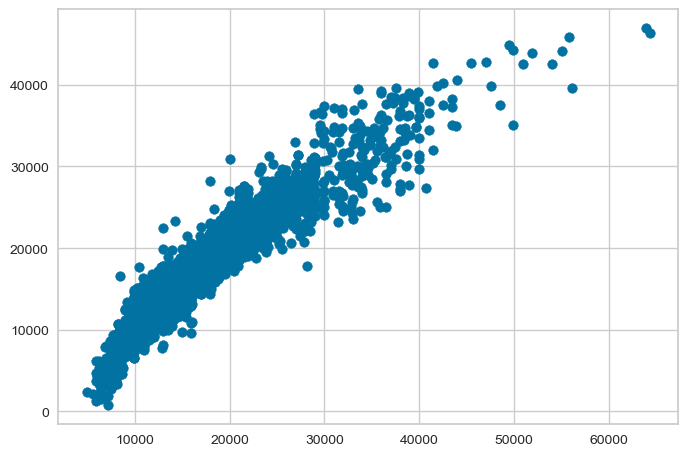

In [24]:
plt.scatter(y_test, y_pred);

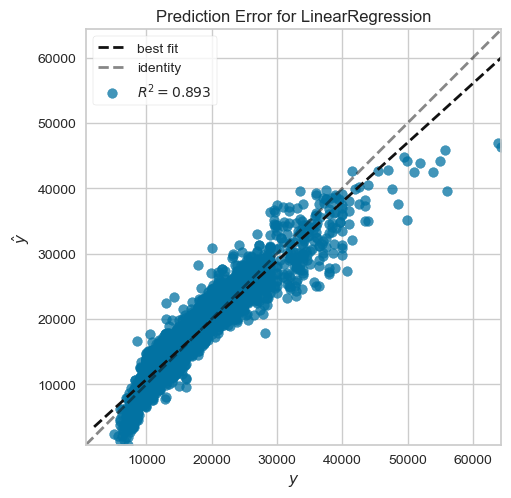

In [25]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

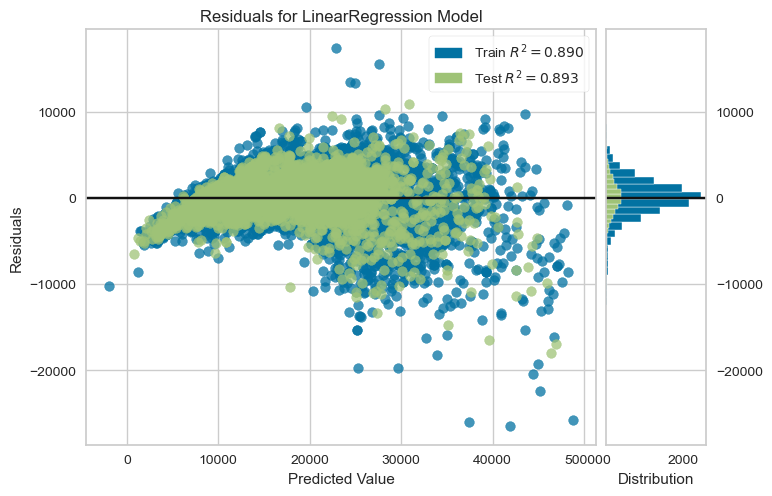

In [26]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [27]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [28]:
compare.sample(10)

,Actual,Pred
8540,11890,14191.349651
14730,11490,12531.265316
6734,11840,10393.293808
4024,18990,22798.474219
4062,19550,20486.230934
14305,9999,10212.678406
7558,14490,14157.001812
4098,19500,18702.495696
3617,38000,34577.694100
14993,26300,27162.485483


In [29]:
from sklearn.model_selection import cross_val_score

lin_MAE = mean_absolute_error(y_test, y_pred)
lin_r2_score = cross_val_score(estimator=lm, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=lm, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
lin_RMSE = np.sqrt(-cv_RMSEs.mean())
print('lin_MAE:',lin_MAE,
      '\nlin_R2_score:',lin_r2_score,
      '\nlin_RMSE:',lin_RMSE)

lin_MAE: 1718.9533253019374 
lin_R2_score: 0.8848430699684723 
lin_RMSE: 2483.8920653655478


## **2.Ridge Regression**

In [30]:
from sklearn.linear_model import Ridge, RidgeCV

In [31]:
ridge_model=Ridge(normalize=True)
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [32]:
y_pred=ridge_model.predict(X_test)
y_pred_train=ridge_model.predict(X_train)

In [33]:
eval_metrics(y_test, y_pred)

R2_Score:0.8370139871916263
MAE:2064.717639802172
MSE:8795960.76720428
RMSE:2965.798504147623


In [34]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.8272708229380635
MAE:2099.3328607782796
MSE:9432824.611352453
RMSE:3071.290382128081


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

In [35]:
alpha_space = np.linspace(0.01, 5, 50)

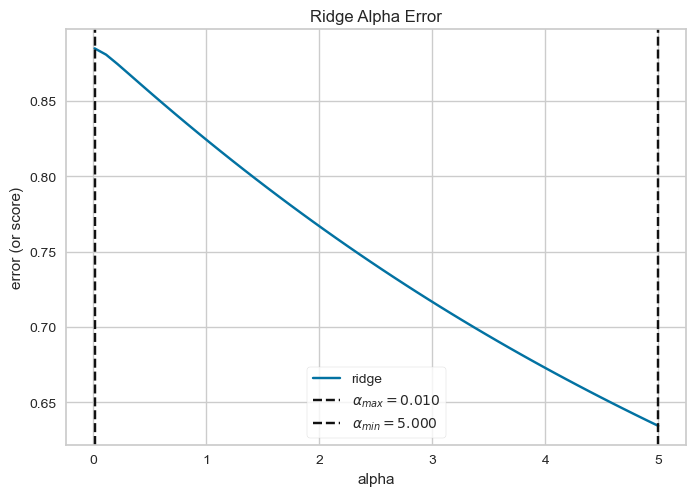

In [36]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show();

In [37]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

R2_Score:0.8930419555861095
MAE:1718.4640966055847
MSE:5772266.872419241
RMSE:2402.5542392252546


In [38]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [39]:
compare.sample(10)

,Actual,Pred
8928,7950,4039.893878
15,18700,17778.475876
511,13690,13519.249618
9694,14300,14248.112013
1450,15970,16216.472521
3434,20999,24588.110984
6613,17260,17141.716867
735,14200,12882.811407
13708,7500,5716.002389
1594,23700,24878.628739


In [40]:
from sklearn.model_selection import cross_val_score

ridge_MAE = mean_absolute_error(y_test, y_pred)
ridge_r2_score = cross_val_score(estimator=ridge_model, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=ridge_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
ridge_RMSE = np.sqrt(-cv_RMSEs.mean())
print('Ridge_MAE:',ridge_MAE,
      '\nRidge_R2_score:',ridge_r2_score,
      '\nRidge_RMSE:',ridge_RMSE)

Ridge_MAE: 1718.4640966055847 
Ridge_R2_score: 0.8849369213904396 
Ridge_RMSE: 2483.055885422312


## **3.Lasso regression**

In [41]:
from sklearn.linear_model import Lasso, LassoCV

In [42]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)

Lasso(normalize=True)

In [43]:
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [44]:
eval_metrics(y_test, y_pred)

R2_Score:0.8866403144079426
MAE:1746.84893863055
MSE:6117747.958057426
RMSE:2473.408166489596


In [45]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.8800893232243308
MAE:1751.5437528832263
MSE:6548380.547473336
RMSE:2558.980372623701


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

In [46]:
# MAE, MSE, RMSE nin scalini price scaleinda dusunulmeli

In [47]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)
# normalize=True deyince ayrica scaling yapmaya gerek yok

# ridge yavas, lasso hizli calisir

In [48]:
lasso_cv_model.alpha_

0.1

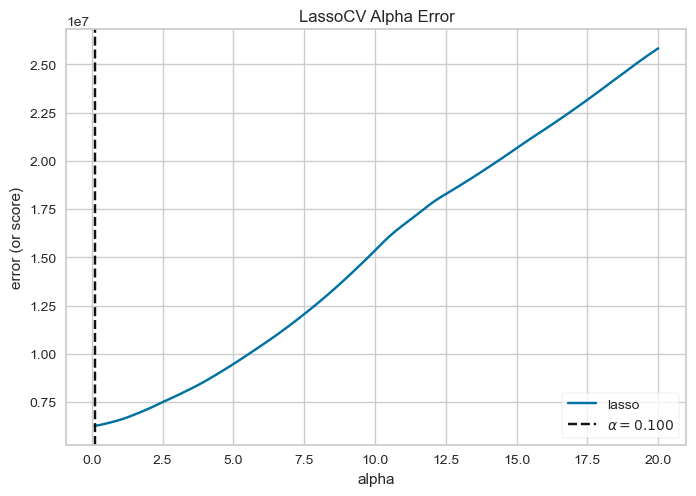

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [49]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

**alpha yi manuel buyutursek feature sayisini dusurur ama R2 score dan feragat etmemiz gerekir**

In [50]:
# alpha yi manuel buyutursek feature sayisini dusurur ama R2 score dan feragat etmemiz gerekir
lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

lasso_MAE = mean_absolute_error(y_test, y_pred)
lasso_r2_score = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
lasso_RMSE = np.sqrt(-cv_RMSEs.mean())
print('Lasso_MAE:',lasso_MAE,
      '\nLasso_R2_score:',lasso_r2_score,
      '\nLasso_RMSE:',lasso_RMSE)

Lasso_MAE: 3125.256195796241 
Lasso_R2_score: 0.8249813761073742 
Lasso_RMSE: 3067.9147062654447


In [51]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
print('Number of Features:',len(significant_features))
significant_features

Number of Features: 10


,features,coef
0,km,-0.017708
1,hp,112.163609
7,Gears,1111.435318
8,Age,-1429.841590
13,cc_Automatic climate control,489.143064
93,ss_LED Headlights,165.739975
106,make_model_Audi A3,231.797793
108,make_model_Opel Corsa,-210.638696
112,make_model_Renault Espace,2759.483323
129,Gearing_Type_Manual,-267.747367


**with optimum alpha**

In [52]:
lasso_model = Lasso(0.01, normalize=True).fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [53]:
eval_metrics(y_test, y_pred)

R2_Score:0.8930684556446443
MAE:1718.2303526483627
MSE:5770836.728376913
RMSE:2402.2565908696997


In [54]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.8896648028567484
MAE:1709.542669932192
MSE:6025458.934121435
RMSE:2454.6810249238974


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

In [55]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

compare.sample(10)

,Actual,Pred
3822,21500,21679.408831
7417,14990,14933.112666
2929,15980,18952.336761
5369,24950,23276.345150
2439,22300,21187.939899
13370,12900,14571.237078
15270,17900,28243.250812
5683,25272,26628.699005
8624,7590,5099.656267
9526,9800,9541.357904


In [56]:
from sklearn.model_selection import cross_val_score
lasso_MAE = mean_absolute_error(y_test, y_pred)
lasso_r2_score = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
lasso_RMSE = np.sqrt(-cv_RMSEs.mean())
print('Lasso_MAE:',lasso_MAE,
      '\nLasso_R2_score:',lasso_r2_score,
      '\nLasso_RMSE:',lasso_RMSE)

Lasso_MAE: 1718.2303526483627 
Lasso_R2_score: 0.885046027240441 
Lasso_RMSE: 2481.7561588873073


In [57]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
print('Number of Features:',len(significant_features))
significant_features

Number of Features: 136


,features,coef
0,km,-0.037300
1,hp,89.924752
2,Previous_Owners,118.786046
3,Inspection_New,-189.155263
4,Nr_of_Doors,375.486703
...,...,...
137,Fuel_LPG/CNG,-113.147088
138,Upholstery_Type_Cloth,-302.793182
141,Upholstery_Color_Brown,1467.386869
142,Upholstery_Color_Grey,104.866523


In [58]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
significant_features.sort_values(by="coef", ascending=False)

,features,coef
136,Fuel_Electric,6090.064993
112,make_model_Renault Espace,3894.188007
106,make_model_Audi A3,3340.679603
130,Gearing_Type_Semi-automatic,2594.392191
21,cc_Heads-up display,2375.465400
...,...,...
107,make_model_Opel Astra,-2121.494990
133,Drive_Chain_rear,-2125.418705
108,make_model_Opel Corsa,-3299.370713
110,make_model_Renault Clio,-3483.418008


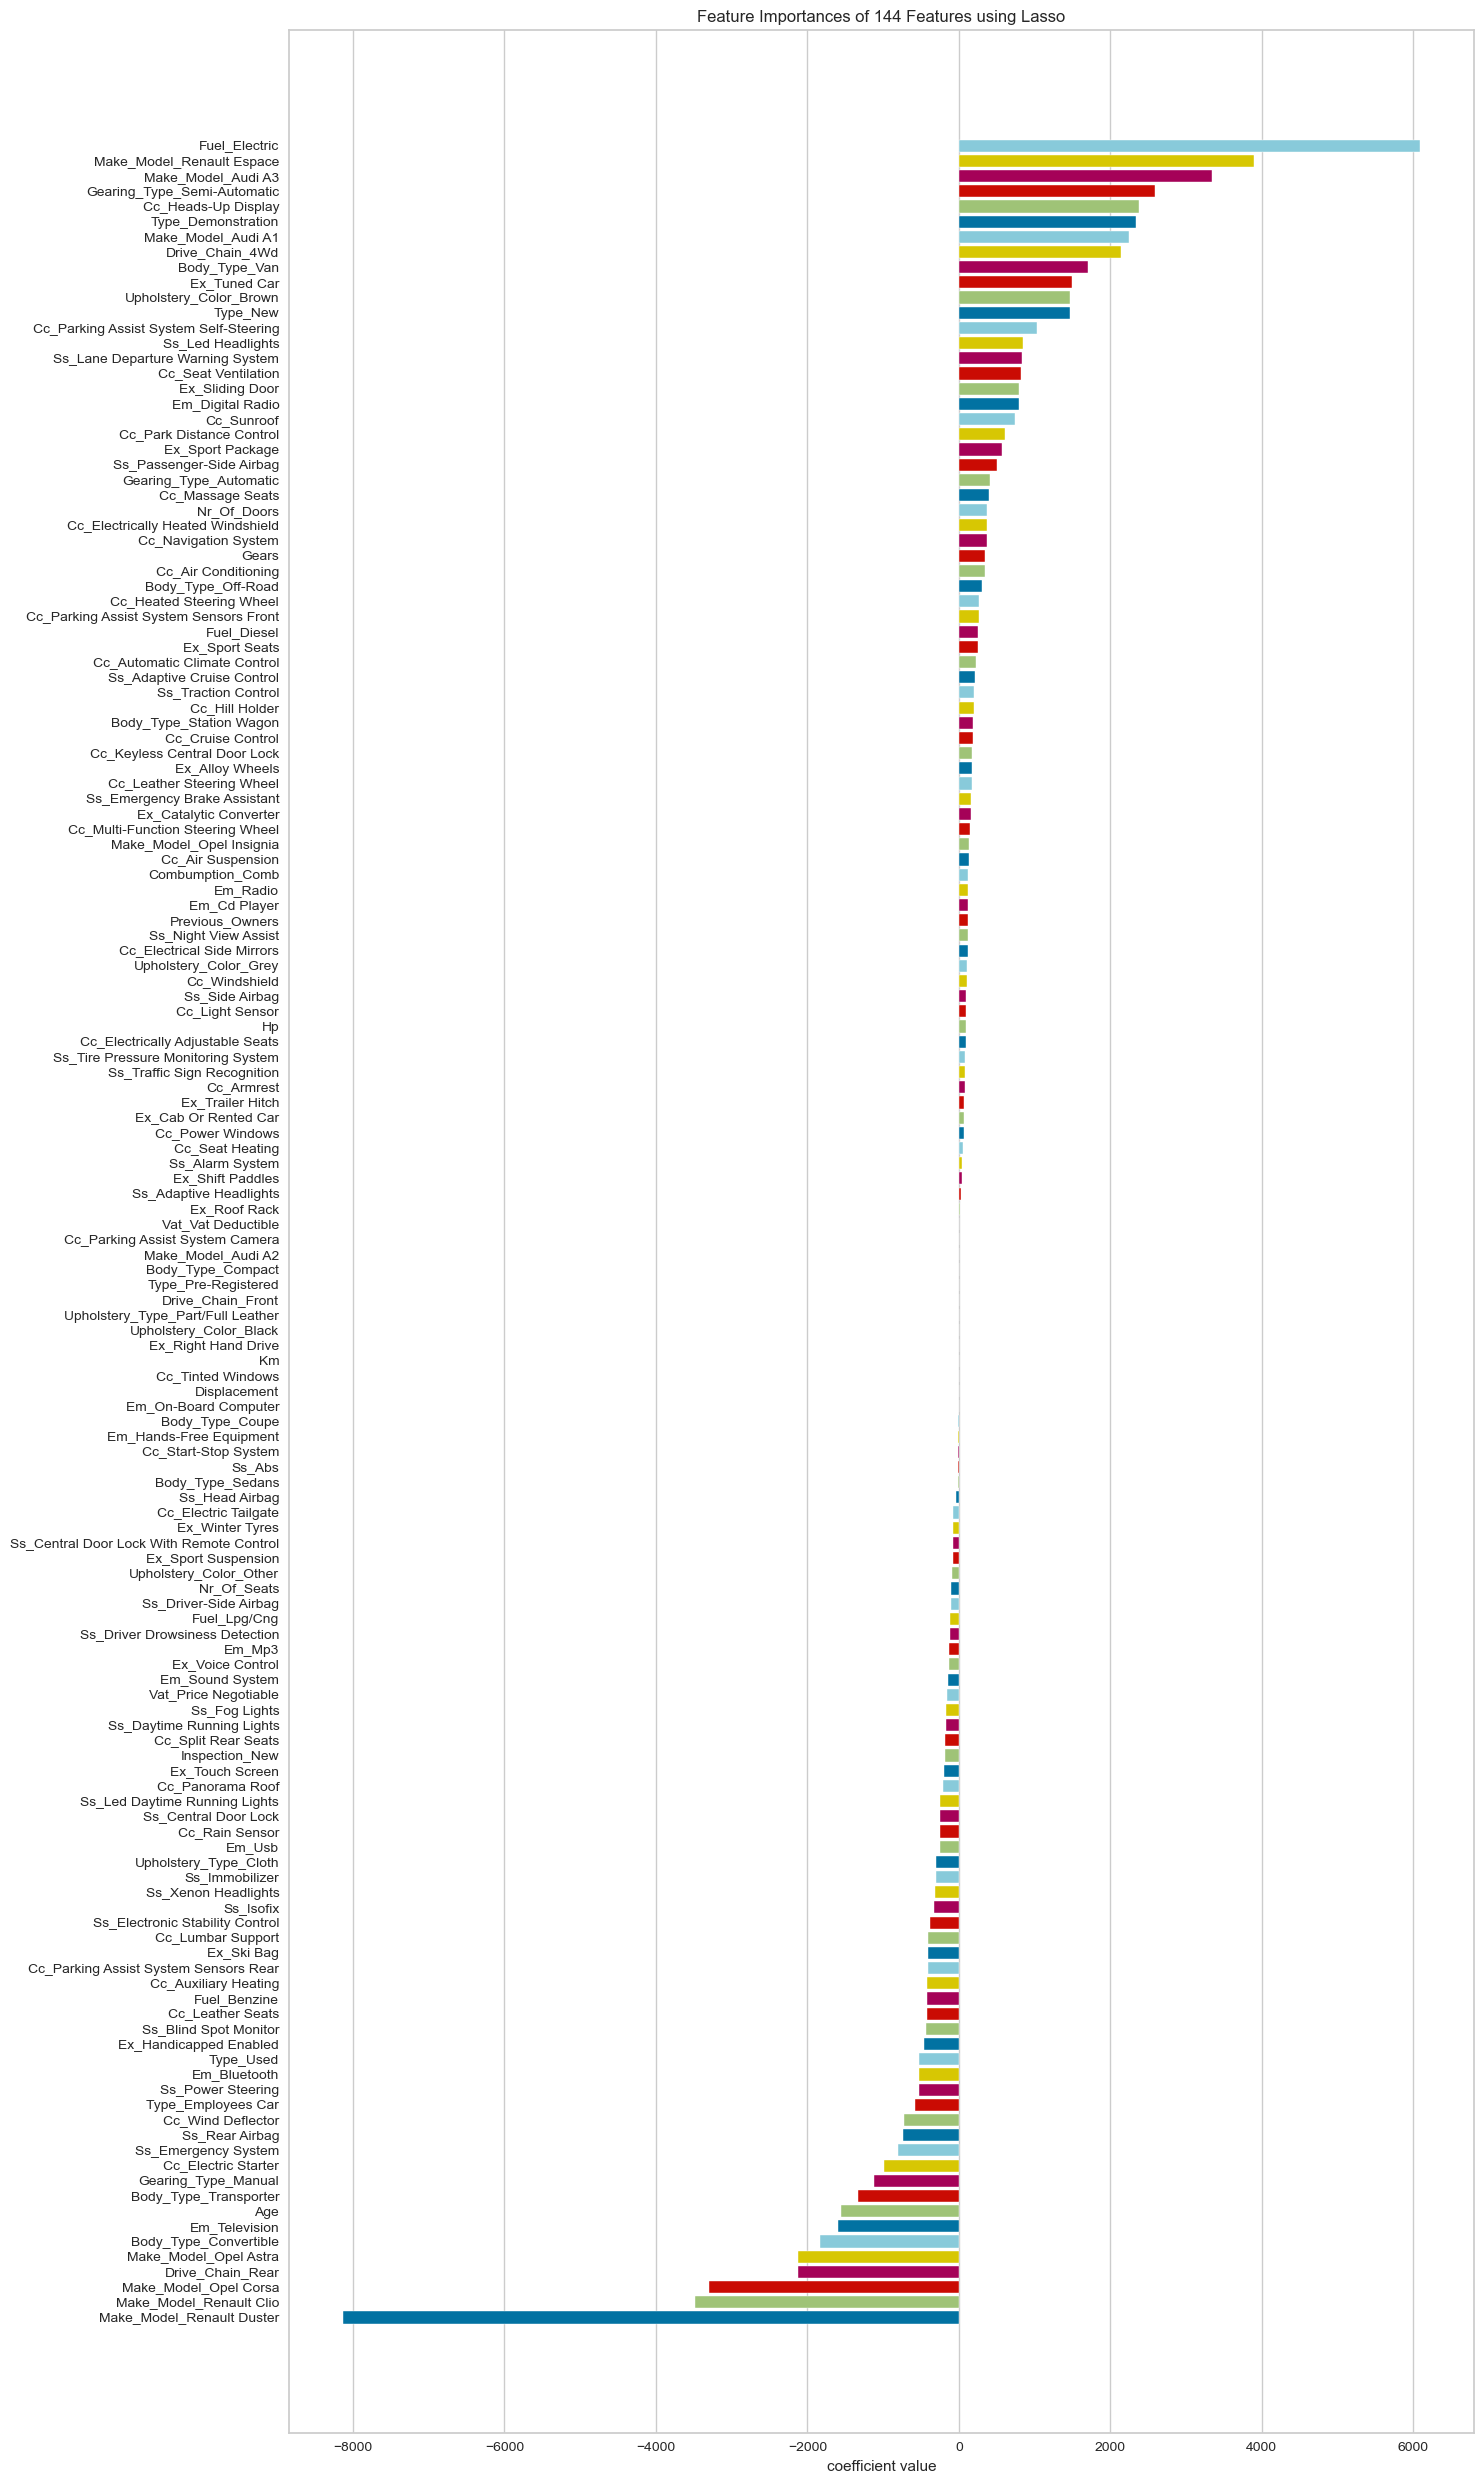

<AxesSubplot:title={'center':'Feature Importances of 144 Features using Lasso'}, xlabel='coefficient value'>

In [59]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1500, 2500))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

## 4.Randon Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred=rfr_model.predict(X_test)
y_pred_train=rfr_model.predict(X_train)

In [62]:
eval_metrics(y_test, y_pred)

R2_Score:0.9580313194977633
MAE:848.1434358209116
MSE:2264948.1436362816
RMSE:1504.9744661077416


In [63]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.9933844958937863
MAE:334.8372419732737
MSE:361275.9060805336
RMSE:601.0623146401158


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

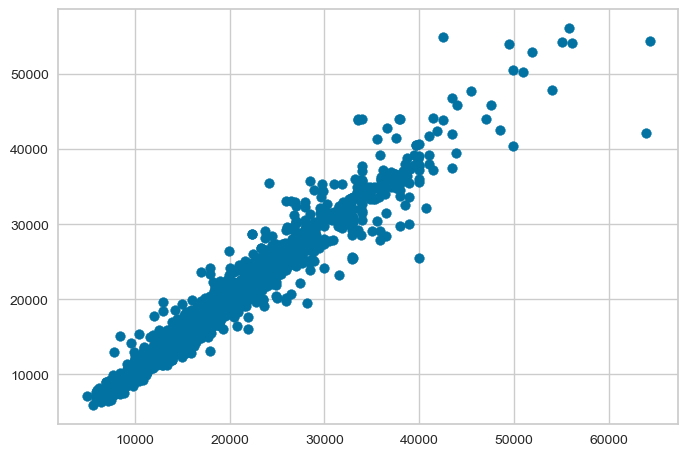

In [64]:
plt.scatter(y_test, y_pred);

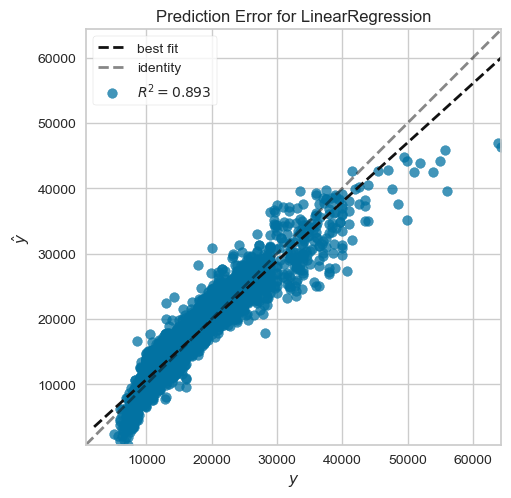

In [65]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

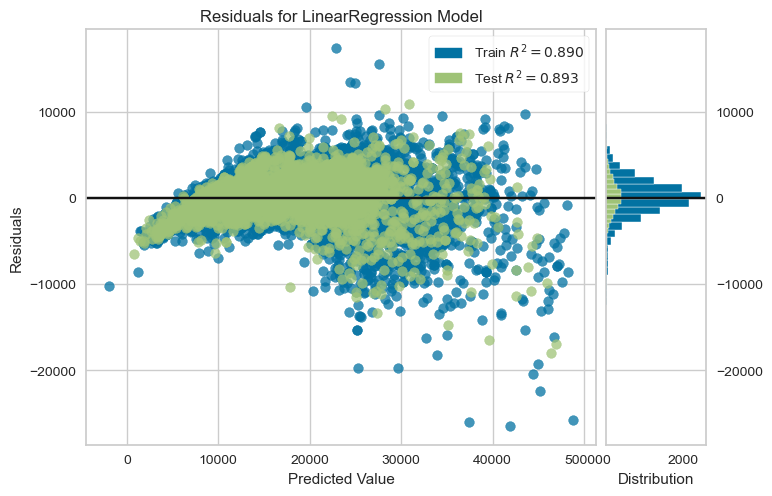

In [66]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [67]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

compare.sample(10)

,Actual,Pred
744,23490,21667.620000
9929,17250,15998.480000
10450,10990,11002.674167
5292,24350,25221.935714
4682,22500,22378.216667
1880,16490,16473.100000
11082,12500,13627.110000
5554,23289,23049.000000
14743,11400,11204.658162
11177,9850,10164.030000


In [68]:
from sklearn.model_selection import cross_val_score

rfr_MAE = mean_absolute_error(y_test, y_pred)
rfr_r2_score = cross_val_score(estimator=rfr_model, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=rfr_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
rfr_RMSE = np.sqrt(-cv_RMSEs.mean())
print('rfr_MAE:',rfr_MAE,
      '\nrfr_R2_score:',rfr_r2_score,
      '\nrfr_RMSE:',rfr_RMSE)

rfr_MAE: 848.1434358209116 
rfr_R2_score: 0.933186452819393 
rfr_RMSE: 1892.2830103539839


### RF Tunning

In [69]:
rf=RandomForestRegressor()

In [70]:
# rf_params = {"n_estimators":[100, 200, 300],
#               "max_depth":[7,13,19],
#               "max_features": [8,10,12],
#               "min_samples_split": [2,4,6]}

In [71]:
# rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [72]:
# rf_cv_model.best_params_

In [73]:
rf_tuned = RandomForestRegressor(max_depth = 33,             
                                  max_features = 50, 
                                  min_samples_split = 2, 
                                  n_estimators = 500).fit(X_train, y_train)

In [74]:
y_pred = rf_tuned.predict(X_test)

In [75]:
from sklearn.model_selection import cross_val_score

rfr_MAE = mean_absolute_error(y_test, y_pred)
rfr_r2_score = cross_val_score(estimator=rf_tuned, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=rf_tuned, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
rfr_RMSE = np.sqrt(-cv_RMSEs.mean())
print('rfr_MAE:',rfr_MAE,
      '\nrfr_R2_score:',rfr_r2_score,
      '\nrfr_RMSE:',rfr_RMSE)

rfr_MAE: 815.9194791410367 
rfr_R2_score: 0.9335098218063422 
rfr_RMSE: 1884.193955532571


## 5.XGBoost

In [76]:
from xgboost import XGBRegressor
xgr_model = XGBRegressor(n_estimators=100)
xgr_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred=xgr_model.predict(X_test)
y_pred_train=xgr_model.predict(X_train)

In [78]:
eval_metrics(y_test, y_pred)

R2_Score:0.9595204358063737
MAE:927.1163020587888
MSE:2184584.1393720577
RMSE:1478.0338762599652


In [79]:
eval_metrics(y_train, y_pred_train)

R2_Score:0.987302879289468
MAE:597.1701930912268
MSE:693395.9552685923
RMSE:832.7040021932117


* Train and test evaluation scores are near with each oother. So We can say there is no overfitting.

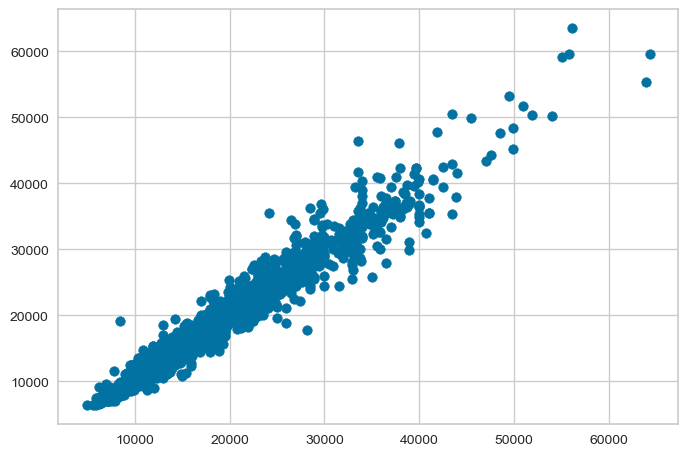

In [80]:
plt.scatter(y_test, y_pred);

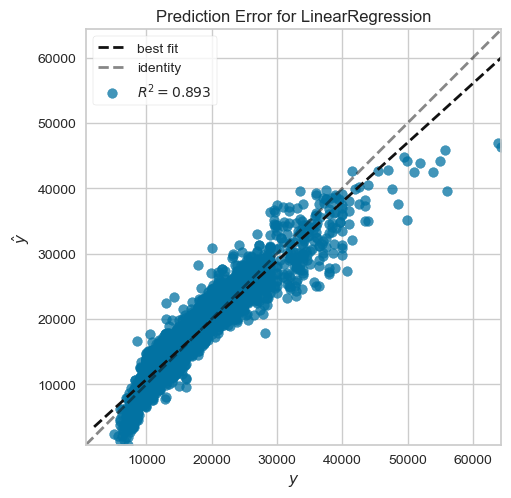

In [81]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

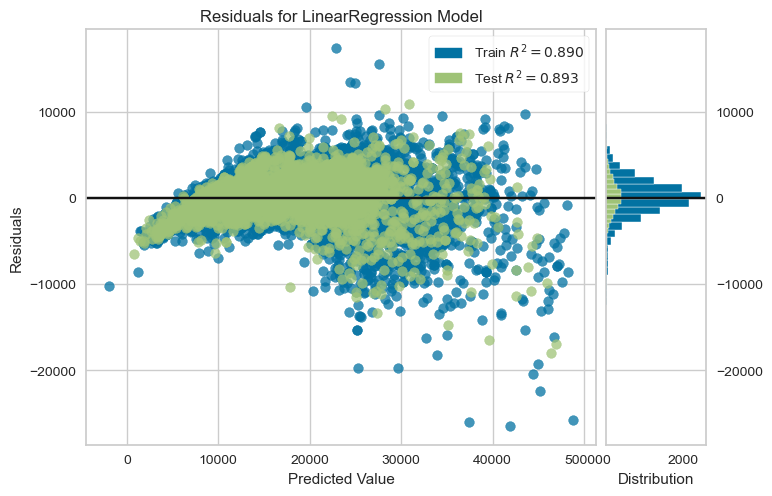

In [82]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [83]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

compare.sample(10)

,Actual,Pred
12604,28950,30611.976562
1190,15900,15831.218750
907,14500,14319.828125
2227,20988,20351.054688
6576,17870,16080.844727
1944,27980,26163.998047
7856,23200,21864.484375
9799,9900,9775.599609
14316,9999,9966.350586
14109,9900,9940.749023


In [84]:
from sklearn.model_selection import cross_val_score

xgr_MAE = mean_absolute_error(y_test, y_pred)
xgr_r2_score = cross_val_score(estimator=xgr_model, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=xgr_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
xgr_RMSE = np.sqrt(-cv_RMSEs.mean())
print('xgr_MAE:',xgr_MAE,
      '\nxgr_R2_score:',xgr_r2_score,
      '\nxgr_RMSE:',xgr_RMSE)

xgr_MAE: 927.1163020587888 
xgr_R2_score: 0.9373511809962967 
xgr_RMSE: 1825.977005177881


###  Tunning XGBOOST

In [85]:
xgb=XGBRegressor()

In [86]:
# xgb_params={"learning_rate":[0.1,0.01,0.3,0.5],
#              "max_depth":[21,25,33],
#              "n_estimators":[50,100,300],
#              "subsample":[0.1,0.5,0.8,1]}

In [87]:
# xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [88]:
# xgb_cv_model.best_params_

In [89]:
xgb_tuned = XGBRegressor(learning_rate= 0.1, 
                                max_depth= 33, 
                                n_estimators= 1000, 
                                subsample= 0.8).fit(X_train, y_train)

In [90]:
y_pred = xgb_tuned.predict(X_test)

In [91]:
from sklearn.model_selection import cross_val_score

xgr_MAE = mean_absolute_error(y_test, y_pred)
xgr_r2_score = cross_val_score(estimator=xgb_tuned, X=X_test, y=y_test, cv=10).mean()
cv_RMSEs = cross_val_score(estimator=xgb_tuned, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)
xgr_RMSE = np.sqrt(-cv_RMSEs.mean())
print('xgr_MAE:',xgr_MAE,
      '\nxgr_R2_score:',xgr_r2_score,
      '\nxgr_RMSE:',xgr_RMSE)

xgr_MAE: 796.9601844454426 
xgr_R2_score: 0.9406895389702896 
xgr_RMSE: 1778.1217838639452


### Feature Importance for XGBoost

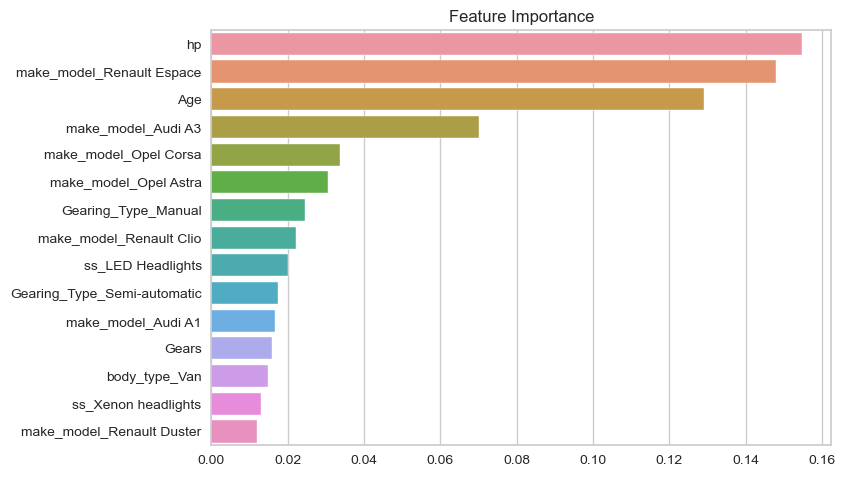

hp                              0.154762
make_model_Renault Espace       0.147874
Age                             0.129197
make_model_Audi A3              0.070094
make_model_Opel Corsa           0.033732
make_model_Opel Astra           0.030679
Gearing_Type_Manual             0.024575
make_model_Renault Clio         0.022129
ss_LED Headlights               0.020030
Gearing_Type_Semi-automatic     0.017559
make_model_Audi A1              0.016765
Gears                           0.015789
body_type_Van                   0.014780
ss_Xenon headlights             0.013124
make_model_Renault Duster       0.012036
Type_Demonstration              0.011171
make_model_Opel Insignia        0.010793
km                              0.010074
Upholstery_Color_Brown          0.009976
cc_Automatic climate control    0.009844
dtype: float32

In [92]:
feature_imp = pd.Series(xgr_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp[:15], y=feature_imp[:15].index)
plt.title("Feature Importance")
plt.show()

feature_imp[:20]

### Feature Importance for Random Forest

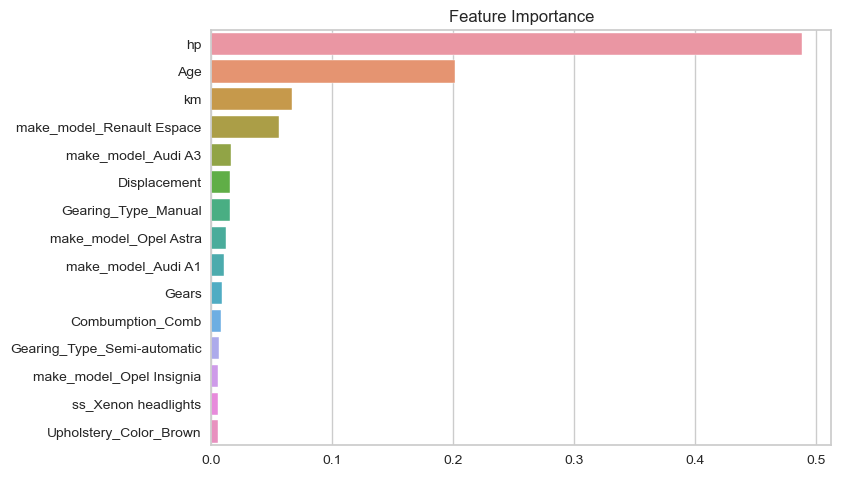

hp                             0.488474
Age                            0.201587
km                             0.066393
make_model_Renault Espace      0.055977
make_model_Audi A3             0.015933
Displacement                   0.015809
Gearing_Type_Manual            0.015538
make_model_Opel Astra          0.012240
make_model_Audi A1             0.010779
Gears                          0.009198
Combumption_Comb               0.008066
Gearing_Type_Semi-automatic    0.005989
make_model_Opel Insignia       0.005866
ss_Xenon headlights            0.005631
Upholstery_Color_Brown         0.005157
ss_LED Headlights              0.004193
Gearing_Type_Automatic         0.004032
make_model_Renault Clio        0.003550
cc_Heads-up display            0.003455
ss_Power steering              0.002599
dtype: float64

In [93]:
feature_imp = pd.Series(rfr_model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp[:15], y=feature_imp[:15].index)
plt.title("Feature Importance")
plt.show()

feature_imp[:20]

### `Compare Models MAE & R2 Scores & RMSE`

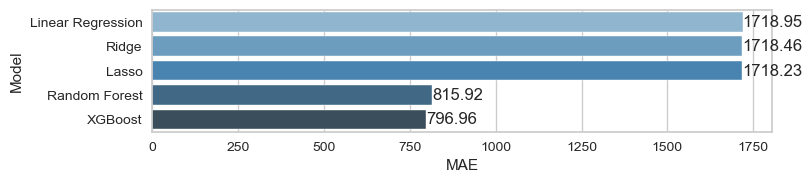

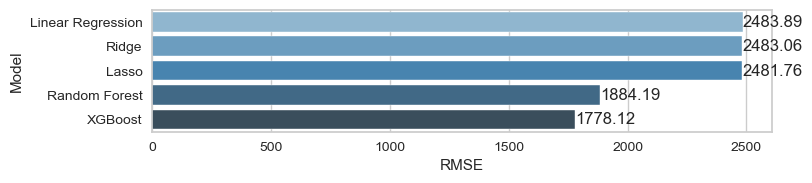

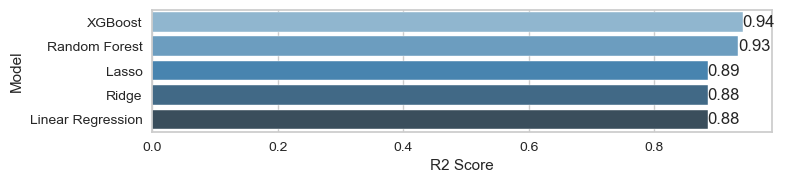

In [94]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Linear Regression","Lasso","Ridge"],
                        "MAE": [rfr_MAE, xgr_MAE, lin_MAE, lasso_MAE, ridge_MAE],
                        "RMSE": [rfr_RMSE, xgr_RMSE, lin_RMSE, lasso_RMSE, ridge_RMSE],
                        "R2 Score": [rfr_r2_score, xgr_r2_score, lin_r2_score, lasso_r2_score, ridge_r2_score]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="MAE", ascending=False)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="RMSE", ascending=False)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="R2 Score", ascending=False)
ax=sns.barplot(x="R2 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### **Saving Model**

In [95]:
import pickle
pickle.dump(xgr_model,open("XGBoostReg.pkl","wb"))
xgr_model = pickle.load(open("XGBoostReg.pkl","rb"))

In [96]:
pickle.dump(rfr_model,open("RFReg.pkl","wb"))
rfr_model = pickle.load(open("RFReg.pkl","rb"))

In [97]:
# tum model sonuclarina bakarak future importance a ve domain bilgisiyle belirledigimiz features lar:

xgb_list=['hp','make_model', 'Age','Gearing_Type','ss_LED Headlights', 'Gears','body_type', 'ss_Xenon headlights']
rfr_list=['hp','Age','km','make_model','Gearing_Type','Displacement','Gears','Combumption_Comb','ss_Xenon headlights']
new_list=list(set(xgb_list).union(rfr_list))
print(new_list)

['ss_Xenon headlights', 'body_type', 'Combumption_Comb', 'Displacement', 'Gearing_Type', 'hp', 'make_model', 'ss_LED Headlights', 'Gears', 'Age', 'km']


In [98]:
my_dict = {'hp':66,
            'Age':3,
            'make_model':'Audi A1',
            'body_type':'Sedans',
            'Displacement':1422.0,
            'Gears':5.0,
            'ss_Xenon headlights':1,
            'Combumption_Comb':3.8,
            'km':56013.0,
            'Gearing_Type':'Automatic',
            'ss_LED Headlights':0}

X = pd.DataFrame.from_dict([my_dict])

X=pd.get_dummies(X)
X.columns

Index(['hp', 'Age', 'Displacement', 'Gears', 'ss_Xenon headlights',
       'Combumption_Comb', 'km', 'ss_LED Headlights', 'make_model_Audi A1',
       'body_type_Sedans', 'Gearing_Type_Automatic'],
      dtype='object')

In [99]:
all_columns=df.drop('price',axis=1).columns
all_columns

Index(['km', 'hp', 'Previous_Owners', 'Inspection_New', 'Nr_of_Doors',
       'Nr_of_Seats', 'Displacement', 'Gears', 'Age', 'Combumption_Comb',
       ...
       'Fuel_Benzine', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG/CNG',
       'Upholstery_Type_Cloth', 'Upholstery_Type_Part/Full Leather',
       'Upholstery_Color_Black', 'Upholstery_Color_Brown',
       'Upholstery_Color_Grey', 'Upholstery_Color_Other'],
      dtype='object', length=144)

In [100]:
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
X

,km,hp,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Displacement,Gears,Age,Combumption_Comb,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Upholstery_Color_Black,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Other
0,56013.0,66,0,0,0,0,1422.0,5.0,3,3.8,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# prediction with XGB Reg
prediction_XGB = xgr_model.predict(X)
print("The Price : ",prediction_XGB[0])

The Price :  15780.106


In [102]:
# prediction with Random Forest Reg
prediction_RFR = rfr_model.predict(X)
print("The Price : ",prediction_RFR[0])

The Price :  16327.19


In [103]:
round(prediction_XGB[0],2)

15780.11